# Basic Example of Using the RevelioNN Library

In [1]:
import os
import sys
import torch

In [2]:
cur_path = os.path.dirname(os.path.abspath("__file__"))
root_path = os.path.dirname(cur_path)
sys.path.append(root_path)

## Preparation of the convolution neural network model

### Initializing the model

In [3]:
from main_net_classes.resnet18_scdb import ResNet18, NUM_CHANNELS, IMG_SIDE_SIZE, transformation

main_net = ResNet18()
main_net.load_state_dict(torch.load('SCDB_ResNet18_C1.pt'))

Using cache found in C:\Users\aaagafonov/.cache\torch\hub\pytorch_vision_v0.10.0
C:\Users\aaagafonov\anaconda3\envs\onto-xai-final\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\aaagafonov\anaconda3\envs\onto-xai-final\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

### Converting the model to RevelioNN format

In [4]:
from revelionn.utils.model import convert_to_rvl_format

convert_to_rvl_format(main_net, 'SCDB_ResNet18_C1', 'C1', 'resnet18_scdb', 'ResNet18', 'transformation', IMG_SIDE_SIZE, NUM_CHANNELS)

## Training mapping networks

In [5]:
device = torch.device('cuda')

### Initializing the MappingTrainer class

In [6]:
from revelionn.mapping_trainer import MappingTrainer

trainer = MappingTrainer('SCDB_ResNet18_C1.rvl', os.path.join(root_path, 'main_net_classes'), ['bn'], 20, 100, os.path.join(root_path, 'trained_models', 'mapping_models'),
                         device, 'D:\\Datasets\\scdb_custom\\images',
                         'D:\\Datasets\\scdb_custom\\scdb_partition_corrected\\C1_mapping_train.csv', 
                         'D:\\Datasets\\scdb_custom\\scdb_partition_corrected\\C1_mapping_val.csv', 
                         'name', 100, 6, None)

Using cache found in C:\Users\aaagafonov/.cache\torch\hub\pytorch_vision_v0.10.0
C:\Users\aaagafonov\anaconda3\envs\onto-xai-final\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\aaagafonov\anaconda3\envs\onto-xai-final\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Training for simultaneous mapping network

In [7]:
trainer.train_simultaneous_model(['HexStar', 'EllStar', 'TEStarmarker', 'Hexagon', 'Star', 'Ellipse', 'Triangle', 'Starmarker'], 
                                 20, [160, 80, 40, 20], [20, 1])

Epoch 1/100.. Train loss: 0.713.. Valid loss: 0.693.. Train acc: 0.037.. Valid acc: 0.033.. Train AUC: 0.739.. Valid AUC: 0.747.. 
Train AUC HexStar: 0.782.. Train AUC EllStar: 0.925.. Train AUC TEStarmarker: 0.777.. Train AUC Hexagon: 0.722.. Train AUC Star: 0.691.. Train AUC Ellipse: 0.910.. Train AUC Triangle: 0.553.. Train AUC Starmarker: 0.550..  
Val AUC HexStar: 0.806.. Val AUC EllStar: 0.908.. Val AUC TEStarmarker: 0.795.. Val AUC Hexagon: 0.784.. Val AUC Star: 0.668.. Val AUC Ellipse: 0.906.. Val AUC Triangle: 0.563.. Val AUC Starmarker: 0.543.. 
Validation loss decreased (inf --> 0.693029).  Saving model ...
Epoch 2/100.. Train loss: 0.629.. Valid loss: 0.562.. Train acc: 0.075.. Valid acc: 0.042.. Train AUC: 0.755.. Valid AUC: 0.748.. 
Train AUC HexStar: 0.804.. Train AUC EllStar: 0.931.. Train AUC TEStarmarker: 0.812.. Train AUC Hexagon: 0.773.. Train AUC Star: 0.653.. Train AUC Ellipse: 0.937.. Train AUC Triangle: 0.574.. Train AUC Starmarker: 0.553..  
Val AUC HexStar: 0.

Epoch 15/100.. Train loss: 0.396.. Valid loss: 0.419.. Train acc: 0.343.. Valid acc: 0.310.. Train AUC: 0.842.. Valid AUC: 0.839.. 
Train AUC HexStar: 0.861.. Train AUC EllStar: 0.928.. Train AUC TEStarmarker: 0.882.. Train AUC Hexagon: 0.823.. Train AUC Star: 0.976.. Train AUC Ellipse: 0.940.. Train AUC Triangle: 0.703.. Train AUC Starmarker: 0.623..  
Val AUC HexStar: 0.849.. Val AUC EllStar: 0.913.. Val AUC TEStarmarker: 0.881.. Val AUC Hexagon: 0.806.. Val AUC Star: 0.975.. Val AUC Ellipse: 0.919.. Val AUC Triangle: 0.702.. Val AUC Starmarker: 0.665.. 
Validation loss decreased (0.425616 --> 0.419496).  Saving model ...
Epoch 16/100.. Train loss: 0.393.. Valid loss: 0.416.. Train acc: 0.344.. Valid acc: 0.339.. Train AUC: 0.845.. Valid AUC: 0.844.. 
Train AUC HexStar: 0.859.. Train AUC EllStar: 0.935.. Train AUC TEStarmarker: 0.881.. Train AUC Hexagon: 0.818.. Train AUC Star: 0.974.. Train AUC Ellipse: 0.943.. Train AUC Triangle: 0.707.. Train AUC Starmarker: 0.646..  
Val AUC HexS

Epoch 29/100.. Train loss: 0.336.. Valid loss: 0.356.. Train acc: 0.412.. Valid acc: 0.408.. Train AUC: 0.885.. Valid AUC: 0.883.. 
Train AUC HexStar: 0.914.. Train AUC EllStar: 0.957.. Train AUC TEStarmarker: 0.918.. Train AUC Hexagon: 0.882.. Train AUC Star: 0.989.. Train AUC Ellipse: 0.969.. Train AUC Triangle: 0.753.. Train AUC Starmarker: 0.697..  
Val AUC HexStar: 0.910.. Val AUC EllStar: 0.941.. Val AUC TEStarmarker: 0.928.. Val AUC Hexagon: 0.864.. Val AUC Star: 0.994.. Val AUC Ellipse: 0.954.. Val AUC Triangle: 0.761.. Val AUC Starmarker: 0.712.. 
EarlyStopping counter: 1 out of 20
Epoch 30/100.. Train loss: 0.336.. Valid loss: 0.338.. Train acc: 0.402.. Valid acc: 0.417.. Train AUC: 0.886.. Valid AUC: 0.887.. 
Train AUC HexStar: 0.910.. Train AUC EllStar: 0.957.. Train AUC TEStarmarker: 0.927.. Train AUC Hexagon: 0.879.. Train AUC Star: 0.988.. Train AUC Ellipse: 0.970.. Train AUC Triangle: 0.757.. Train AUC Starmarker: 0.699..  
Val AUC HexStar: 0.906.. Val AUC EllStar: 0.94

Epoch 43/100.. Train loss: 0.290.. Valid loss: 0.301.. Train acc: 0.469.. Valid acc: 0.448.. Train AUC: 0.912.. Valid AUC: 0.917.. 
Train AUC HexStar: 0.944.. Train AUC EllStar: 0.978.. Train AUC TEStarmarker: 0.939.. Train AUC Hexagon: 0.946.. Train AUC Star: 0.990.. Train AUC Ellipse: 0.982.. Train AUC Triangle: 0.798.. Train AUC Starmarker: 0.723..  
Val AUC HexStar: 0.945.. Val AUC EllStar: 0.966.. Val AUC TEStarmarker: 0.958.. Val AUC Hexagon: 0.935.. Val AUC Star: 0.992.. Val AUC Ellipse: 0.977.. Val AUC Triangle: 0.823.. Val AUC Starmarker: 0.740.. 
EarlyStopping counter: 1 out of 20
Epoch 44/100.. Train loss: 0.294.. Valid loss: 0.304.. Train acc: 0.479.. Valid acc: 0.478.. Train AUC: 0.911.. Valid AUC: 0.916.. 
Train AUC HexStar: 0.946.. Train AUC EllStar: 0.973.. Train AUC TEStarmarker: 0.938.. Train AUC Hexagon: 0.944.. Train AUC Star: 0.991.. Train AUC Ellipse: 0.983.. Train AUC Triangle: 0.802.. Train AUC Starmarker: 0.712..  
Val AUC HexStar: 0.952.. Val AUC EllStar: 0.96

Epoch 57/100.. Train loss: 0.258.. Valid loss: 0.280.. Train acc: 0.529.. Valid acc: 0.499.. Train AUC: 0.930.. Valid AUC: 0.930.. 
Train AUC HexStar: 0.966.. Train AUC EllStar: 0.980.. Train AUC TEStarmarker: 0.947.. Train AUC Hexagon: 0.970.. Train AUC Star: 0.993.. Train AUC Ellipse: 0.986.. Train AUC Triangle: 0.827.. Train AUC Starmarker: 0.767..  
Val AUC HexStar: 0.964.. Val AUC EllStar: 0.966.. Val AUC TEStarmarker: 0.955.. Val AUC Hexagon: 0.962.. Val AUC Star: 0.991.. Val AUC Ellipse: 0.979.. Val AUC Triangle: 0.828.. Val AUC Starmarker: 0.799.. 
EarlyStopping counter: 1 out of 20
Epoch 58/100.. Train loss: 0.251.. Valid loss: 0.268.. Train acc: 0.540.. Valid acc: 0.500.. Train AUC: 0.934.. Valid AUC: 0.933.. 
Train AUC HexStar: 0.972.. Train AUC EllStar: 0.983.. Train AUC TEStarmarker: 0.950.. Train AUC Hexagon: 0.975.. Train AUC Star: 0.992.. Train AUC Ellipse: 0.989.. Train AUC Triangle: 0.824.. Train AUC Starmarker: 0.784..  
Val AUC HexStar: 0.967.. Val AUC EllStar: 0.97

Epoch 71/100.. Train loss: 0.222.. Valid loss: 0.246.. Train acc: 0.571.. Valid acc: 0.552.. Train AUC: 0.943.. Valid AUC: 0.940.. 
Train AUC HexStar: 0.982.. Train AUC EllStar: 0.986.. Train AUC TEStarmarker: 0.953.. Train AUC Hexagon: 0.980.. Train AUC Star: 0.996.. Train AUC Ellipse: 0.989.. Train AUC Triangle: 0.838.. Train AUC Starmarker: 0.824..  
Val AUC HexStar: 0.969.. Val AUC EllStar: 0.976.. Val AUC TEStarmarker: 0.959.. Val AUC Hexagon: 0.973.. Val AUC Star: 0.991.. Val AUC Ellipse: 0.984.. Val AUC Triangle: 0.830.. Val AUC Starmarker: 0.835.. 
EarlyStopping counter: 1 out of 20
Epoch 72/100.. Train loss: 0.227.. Valid loss: 0.240.. Train acc: 0.579.. Valid acc: 0.555.. Train AUC: 0.943.. Valid AUC: 0.942.. 
Train AUC HexStar: 0.978.. Train AUC EllStar: 0.986.. Train AUC TEStarmarker: 0.954.. Train AUC Hexagon: 0.979.. Train AUC Star: 0.993.. Train AUC Ellipse: 0.991.. Train AUC Triangle: 0.836.. Train AUC Starmarker: 0.823..  
Val AUC HexStar: 0.972.. Val AUC EllStar: 0.98

Epoch 85/100.. Train loss: 0.204.. Valid loss: 0.238.. Train acc: 0.589.. Valid acc: 0.541.. Train AUC: 0.953.. Valid AUC: 0.944.. 
Train AUC HexStar: 0.984.. Train AUC EllStar: 0.990.. Train AUC TEStarmarker: 0.961.. Train AUC Hexagon: 0.986.. Train AUC Star: 0.997.. Train AUC Ellipse: 0.992.. Train AUC Triangle: 0.856.. Train AUC Starmarker: 0.859..  
Val AUC HexStar: 0.973.. Val AUC EllStar: 0.974.. Val AUC TEStarmarker: 0.960.. Val AUC Hexagon: 0.976.. Val AUC Star: 0.994.. Val AUC Ellipse: 0.983.. Val AUC Triangle: 0.848.. Val AUC Starmarker: 0.843.. 
EarlyStopping counter: 1 out of 20
Epoch 86/100.. Train loss: 0.223.. Valid loss: 0.264.. Train acc: 0.567.. Valid acc: 0.539.. Train AUC: 0.950.. Valid AUC: 0.945.. 
Train AUC HexStar: 0.983.. Train AUC EllStar: 0.989.. Train AUC TEStarmarker: 0.959.. Train AUC Hexagon: 0.985.. Train AUC Star: 0.995.. Train AUC Ellipse: 0.994.. Train AUC Triangle: 0.845.. Train AUC Starmarker: 0.847..  
Val AUC HexStar: 0.977.. Val AUC EllStar: 0.96

Epoch 99/100.. Train loss: 0.189.. Valid loss: 0.227.. Train acc: 0.620.. Valid acc: 0.587.. Train AUC: 0.957.. Valid AUC: 0.950.. 
Train AUC HexStar: 0.990.. Train AUC EllStar: 0.992.. Train AUC TEStarmarker: 0.964.. Train AUC Hexagon: 0.989.. Train AUC Star: 0.998.. Train AUC Ellipse: 0.993.. Train AUC Triangle: 0.864.. Train AUC Starmarker: 0.867..  
Val AUC HexStar: 0.981.. Val AUC EllStar: 0.974.. Val AUC TEStarmarker: 0.962.. Val AUC Hexagon: 0.982.. Val AUC Star: 0.995.. Val AUC Ellipse: 0.982.. Val AUC Triangle: 0.846.. Val AUC Starmarker: 0.876.. 
EarlyStopping counter: 2 out of 20
Epoch 100/100.. Train loss: 0.210.. Valid loss: 0.236.. Train acc: 0.578.. Valid acc: 0.533.. Train AUC: 0.954.. Valid AUC: 0.945.. 
Train AUC HexStar: 0.984.. Train AUC EllStar: 0.989.. Train AUC TEStarmarker: 0.965.. Train AUC Hexagon: 0.983.. Train AUC Star: 0.995.. Train AUC Ellipse: 0.992.. Train AUC Triangle: 0.857.. Train AUC Starmarker: 0.863..  
Val AUC HexStar: 0.975.. Val AUC EllStar: 0.9

### Evaluating the mapping network

In [8]:
from revelionn.utils.model import load_mapping_model

main_module, mapping_module, activation_extractor, transformation, img_size = load_mapping_model(
    os.path.join(root_path, 'trained_models', 'mapping_models', 'C1_20_[160, 80, 40, 20]_[20, 1].rvl'), 
    cur_path, os.path.join(root_path, 'main_net_classes'), device)

Using cache found in C:\Users\aaagafonov/.cache\torch\hub\pytorch_vision_v0.10.0


In [9]:
from revelionn.datasets import create_dataloader

test_loader = create_dataloader('D:\\Datasets\\scdb_custom\\scdb_partition_corrected\\C1_test.csv', 
                                'D:\\Datasets\\scdb_custom\\images', 'name',
                                mapping_module.get_class_labels(), 100, 6, transformation)
mapping_module.evaluate_model(test_loader)

Test loss: 0.2134.. Test acc: 0.5975.. Test AUC: 0.9481.. 
Test concepts AUC: [0.9813480533138458, 0.9878792414908505, 0.9534641305338418, 0.9862450972327712, 0.9957535388742688, 0.9927575355754008, 0.8373931843602047, 0.8498644982142298]


([0.9813480533138458,
  0.9878792414908505,
  0.9534641305338418,
  0.9862450972327712,
  0.9957535388742688,
  0.9927575355754008,
  0.8373931843602047,
  0.8498644982142298],
 0.9480881599494266)

## Interpretation of the convolutional network

### Formation of logical explanations

In [10]:
from revelionn.utils.explanation import extract_concepts_from_img, explain_target_concept
from ontologies.scdb_ontology import concepts_map
from PIL import Image

image_path = 'D:\\PycharmProjects\\revelionn\\data\\001236.png'

image = Image.open(image_path)
main_concepts, extracted_concepts, mapping_probabilities = extract_concepts_from_img(main_module,
                                                                                     mapping_module,
                                                                                     image,
                                                                                     transformation)
print(f'\nThe image is classified as {main_concepts}.')
print('\nThe following concepts were extracted from the image:')
print(extracted_concepts)
print('with the following probabilities:')
print(f'{mapping_probabilities}\n')
    
justifications = explain_target_concept(extracted_concepts, mapping_probabilities, concepts_map, 'C1',
                                        os.path.join(root_path, 'ontologies', 'SCDB.owl'), 
                                        os.path.join(root_path, 'temp'))
print(justifications)


The image is classified as ['C1'].

The following concepts were extracted from the image:
['HexStar', 'EllStar', 'NotTEStarmarker', 'Hexagon', 'Star', 'Ellipse', 'NotTriangle', 'NotStarmarker']
with the following probabilities:
[0.9892287, 0.9961117, 0.7307813167572021, 0.9938647, 0.9998809, 0.9967223, 0.751079648733139, 0.6663315296173096]

Read Observations: 
	__input__ Type HexStar
	__input__ Type EllStar
	__input__ Type not (TEStarmarker)
	__input__ Type has some Hexagon
	__input__ Type has some Star
	__input__ Type has some Ellipse
	__input__ Type not (has some Triangle)
	__input__ Type not (has some Starmarker)

Found Justifications:
Justification for '__input__ Type C1':	(Degree of Belief: 0.9966)
	__input__ Type has some Star	("0.9998809")
	__input__ Type has some Ellipse	("0.9967223")
	(has some Ellipse) and (has some Star) SubClassOf EllStar
	C1 EquivalentTo EllStar or HexStar or TEStarmarker

Justification for '__input__ Type C1':	(Degree of Belief: 0.99611)
	__input__ Type

### Formation of visual explanations

Saliency maps: (5, 256, 256)
Class HexStar saliency map range: [-0.014413558878004551, 1.0]
Class EllStar saliency map range: [-0.0013842829503118992, 1.0]
Class Hexagon saliency map range: [-0.01079257857054472, 1.0]
Class Star saliency map range: [-8.162015728885308e-05, 1.0]
Class Ellipse saliency map range: [-0.0030527871567755938, 1.0]


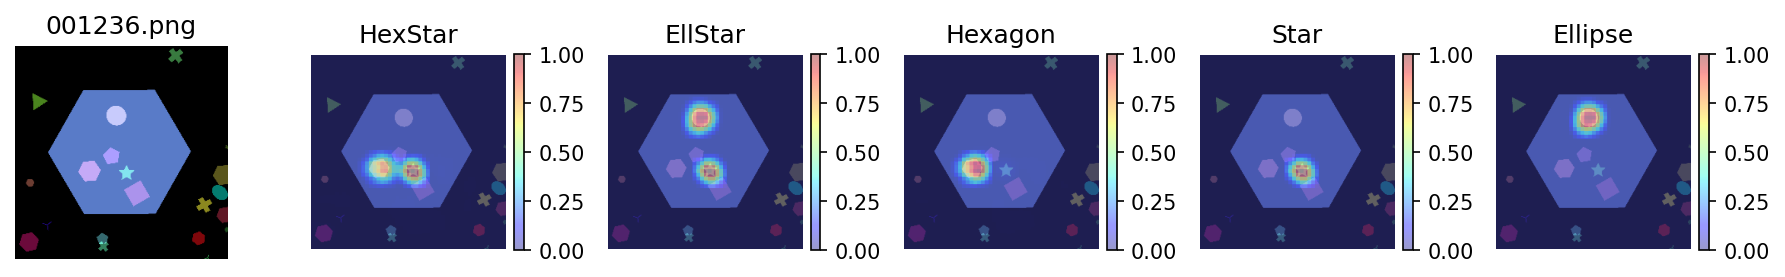

In [11]:
import matplotlib.pyplot as plt
from revelionn.occlusion import perform_occlusion

perform_occlusion(main_module, mapping_module, activation_extractor, transformation, img_size,
                  image_path, window_size=20, stride=5, threads=0)
plt.show()